In [ ]:
# 1. Handle the Null value.
# 2. Encode using the replace method.
# 3. Use three types of encoding techniques for all the columns which contains categorical data.
# 4. Use loop while encoding.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Data Analysis

In [3]:
tnp = pd.read_csv("insurance.csv")

In [4]:
tnp.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
tnp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
tnp.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
tnp.isnull()

,age,gender,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
tnp.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
tnp.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
tnp.mode()

,age,gender,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [11]:
tnp1 = tnp.copy()
tnp2 = tnp.copy()
tnp3 = tnp.copy()
tnp4 = tnp.copy()

# Encoding

Replace Method

In [12]:
tnp1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
tnp1.gender = tnp1.gender.replace(['male', 'female'], [1, 2])
tnp1.smoker = tnp1.smoker.replace(['yes', 'no'], [1, 2])
tnp1.region = tnp1.region.replace(['southwest', 'southeast', 'northwest', 'northeast'], [1, 2, 3, 4])

In [14]:
tnp1.head(10)

,age,gender,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,2,2,1725.55230
2,28,1,33.000,3,2,2,4449.46200
3,33,1,22.705,0,2,3,21984.47061
4,32,1,28.880,0,2,3,3866.85520
5,31,2,25.740,0,2,2,3756.62160
6,46,2,33.440,1,2,2,8240.58960
7,37,2,27.740,3,2,3,7281.50560
8,37,1,29.830,2,2,4,6406.41070
9,60,2,25.840,0,2,3,28923.13692


Correlation

In [15]:
tnp1.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
gender,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


<Axes: >

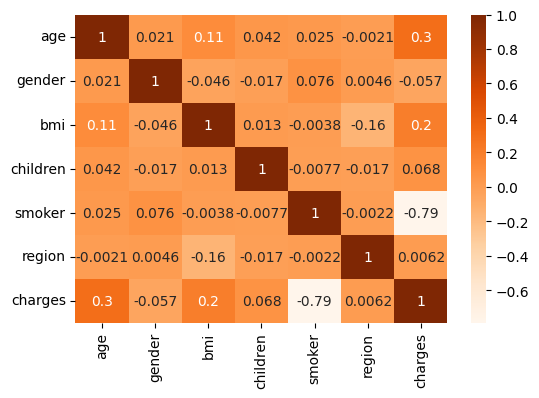

In [16]:
plt.figure(figsize=(6,4))
sb.heatmap(tnp1.corr(), annot=True, cmap="Oranges")

# Label Encoding

Using Loop

In [86]:
tnp2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
le = LabelEncoder()

In [88]:
for col in tnp2.columns:
    if (not is_numeric_dtype(tnp2[col])):
        tnp2[col] = le.fit_transform(tnp[col])

In [89]:
tnp2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Ordinal Encoding

Using Loop

In [90]:
tnp3.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [91]:
oe = OrdinalEncoder(categories=[tnp3[col].unique()])

In [92]:
for col in tnp3.columns:
    if (not is_numeric_dtype(tnp3[col])):
        tnp3[col] = le.fit_transform(tnp3[col])

In [93]:
tnp3.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# One Hot Encoding / Dummy Variable Encoder

Using Loop

In [94]:
tnp4.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
for col in tnp4.columns:
    if (not is_numeric_dtype(tnp4[col])):
        dummy = pd.get_dummies(tnp4[col], drop_first=True, dtype=int, prefix=col)
        tnp4 = pd.concat([tnp4,dummy],axis=1).drop(col,axis=1)

In [96]:
tnp4.head()

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
